# Antonio Noemi A01026100
# Examen

# Problemática 1
## Planteamiento del Problema


Desde que Bitcoin se lanzó de forma misteriosa en 2009, las criptomonedas han sido un tema muy interesante en nustro sistema finanicero. La propuesta es simple: monedas digitales que funcionan sin bancos ni gobiernos, apoyándose en una red de computadoras que validan cada transacción a través de la “minería”: un proceso en el que los llamados mineros usan potencia de cómputo para resolver problemas matemáticos y asegurarse de que nadie gaste dos veces las mismas monedas, recibiendo como recompensa nuevos tokens (Binance Academy). Sus primeros años fueron de adopción muy reducida, pero la curiosidad y las ganancias atrajeron cada vez más atención: en 2013 el precio pasó de unos dólares a más de 1 000 USD, marcando el primer gran “boom” del ecosistema.

Viendo los aspectos técnicos, un aspecto clave en la economía de Bitcoin es su política monetaria programada: tras cada 210 000 bloques, la recompensa a los mineros se reduce a la mitad (halving), limitando la emisión de nuevos tokens y creando una dinámica deflacionaria. Hasta la fecha hemos tenido 4 y los 4 han sido seguidos por un mercado alcista (Investopedia). Mientras Bitcoin establecía su camino, aparecieron las primeras “altcoins” —monedas alternativas— como Litecoin (2011) o Dogecoin (2013), que introdujeron nuevas velocidades de transacción o simplemente experimentos de comunidad. Con el boom de las ICO en 2017 y la explosión de miles de tokens, las altcoins pasaron de ser curiosidades técnicas a constituir una parte significativa del mercado.

En 2020 irrumpió con fuerza la Finanzas Descentralizadas (DeFi), donde aplicaciones financieras (préstamos, exchanges, derivados) se ejecutan en cadena sin intermediarios, y el valor bloqueado en estos protocolos pasó de cientos de millones a varios miles de millones de dólares en meses. A ello se sumaron los NFTs y la llegada de inversores institucionales, llevando la capitalización total de todas las criptomonedas por encima del billón de dólares. (Coinmarketcap)

Hoy en día, las criptomonedas ya no son una curiosidad, son parte importante de nuestro sistema financiero, con fondos de inversión, ETFs y reservas corporativas participando en la adopción a este activo.

Ya hablamos de halvings, de la introducción de las altcoins, de la introducción del defi y de los NFTs. Todos estos son puntos clave que han marcado el camino de las criptomonedas, pero para entender de verdad cómo todas estas etapas se enlazan y cuándo el mercado cambia de marcha, necesitamos una vista de conjunto, no solo gráficos de precios. Con el análisis topológico  y herramientas como Mapper agrupamos días que se comportan de manera parecida  y así obtenemos un “mapa” claro de los momentos clave, los puntos de inflexión y los ciclos que han definido la evolución de las criptomonedas.


## Metodología seguida

Paso 1: Preparación de la base de datos:

- La base de datos sugerida por la problemática nos presentaba 23 csv con data sobre precio, volumen y capitalización de mercado por fecha para 23 diferentes criptomonedas
- Estas 23 bases se unieron en una sola
- Se calcularon las variables de retorno y volatilidad. Esto porque tenemos monedas con gran diferencia de precios debido a su naturaleza, y con el retorno capturamos el cambio porcentual diario (subida o caída) y con la volatilidad medimos cuán brusco fue ese movimiento en cada jornada, de modo que podamos comparar monedas de distinto tamaño en igualdad de condiciones y usar esas métricas para agrupar días similares en el análisis topológico.
- Finalmente, se creó un conglomerado de las 23 criptomonedas por día, de esta forma generamos un "mercado total" con la muestra de las 23 cryptos y podemos analizar por día lo que sucede en el mercado de forma total.

Paso 2: Selección de variables relevantes:

- Se seleccionaro las variables de retorno, volatilidad, volumen y capitalización del mercado para hacer el análisis.

Paso 3: Limpieza y normalización

- Se eliminaron registros con valores faltantes (dropna()).
- Se aplicó StandardScaler() para normalizar las variables y que todas tuvieran media 0 y desviación estándar 1.

Paso 4: Reducción de dimensión y filtro topológico

- Se utilizó una combinación de UMAP y densidad como filtro 2D para construir el grafo porque UMAP permite capturar la estructura global y local y la densidad identifica zonas con mayor concentración de perfiles similares. Esta combinación permite ver tanto las grandes tendencias como los pequeños detalles: proyecta los datos en dos ejes que conservan la forma general y la estructura local, y al marcar con densidad las zonas donde muchos días comparten rasgos muy parecidos, el grafo resultante agrupa automáticamente fases de mercado.

Paso 5: Construcción del grafo con KeplerMapper

- Se aplicó KeplerMapper con filtro [UMAP, densidad].
- Se generó un grafo donde cada nodo representa un grupo de días de mercado que comparten perfiles parecidos en retorno, volatilidad, volumen y capitalización, y las conexiones entre nodos muestran solapamientos de esos días.

Paso 6: Análisis e interpretación del grafo

- Se identificaron rápidamente las fases del mercado por cómo estaban divididas las componentes en el grafo, además de la estructura general del mercado. Pero para ir más a detalle, se estudiaron los nodos y a información que contenían.

Paso 7: Interpretación de los nodos

- Para nodos individuales obtuvimos sus medias de las métricas principales (volumen, capitalización de mercado, retorno), las criptomonedas que lideraron el cambio ese día y se extrajo el rango de fechas que contenía el nodo. De esta forma permitiéndonos identificar qué tipo de días representaba este nodo y entender mejor el contexto, su posición en el grafo y su relación con el resto.


In [ ]:
!pip install kmapper tadasets
!pip install umap-learn
import umap
import numpy as np
import sklearn
import kmapper as km
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_distances
import tadasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 4.2 MB/s eta 0:00:00


### Carga de la  base de datos

Nuestra base de datos tenía 23 csv referentes a 23 criptomonedas distintas, se unieron los 23 en uno solo

In [ ]:
df_crypto = pd.read_csv('crypto_merged.csv')

In [ ]:
display(df_crypto.head())

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [ ]:
df_crypto.dtypes

,0
SNo,int64
Name,object
Symbol,object
Date,object
High,float64
Low,float64
Open,float64
Close,float64
Volume,float64
Marketcap,float64


### Ajuste de variables y creación devariables nuevas

- Convertimos la variable Date a formato Fecha
- Calculamos dos nuevas variables que nos ayudarán a hacer el análisis. Retorno y Volatilidad. Esto porque las crypto tienen diferentes precios y oferta de tokens disponibles, por ejemplo BTC tiene un precio mucho mayor al resto, así que para realmente analizar cambios usamos medidas como retorno y volatilidad que representan porcentaje y son aplicables a todas las monedas por igual sin importar su precio actual.

In [ ]:
df_crypto['Date'] = pd.to_datetime(df_crypto['Date'])
df_crypto['retorno']     = df_crypto['Close']/df_crypto['Open'] - 1
df_crypto['volatilidad'] = (df_crypto['High'] - df_crypto['Low'])/df_crypto['Open']

In [ ]:
df_crypto.dtypes

,0
SNo,int64
Name,object
Symbol,object
Date,datetime64[ns]
High,float64
Low,float64
Open,float64
Close,float64
Volume,float64
Marketcap,float64


Agrupamos los datos por día para todas las monedas, de esta forma obtenemos un "mercado general" de las principales crypto, las cuales podemos analizar con datos diarios del mercado.

In [ ]:
# Agrupa por Date para “mercado diario”
df_agg = df_crypto.groupby('Date').agg({
    'retorno'    : 'mean',   # retorno medio de todas las coins ese día
    'volatilidad': 'mean',   # volatilidad media
    'Volume'     : 'sum',    # volumen total del mercado
    'Marketcap'  : 'sum'     # capitalización total
}).reset_index()

df_agg['Date_ord'] = df_agg['Date'].map(lambda d: d.toordinal())

In [ ]:
# Quitra días sin volumen
df_agg = df_agg[df_agg['Volume'] > 0].reset_index(drop=True)

In [ ]:
df_agg.head(50)

,Date,retorno,volatilidad,Volume,Marketcap,Date_ord
0,2013-12-27 23:59:59,-0.031210,0.142435,7.860074e+07,9.741173e+09,735229
1,2013-12-28 23:59:59,-0.043745,0.080774,4.399448e+07,9.640329e+09,735230
2,2013-12-29 23:59:59,0.019346,0.095233,3.081325e+07,9.889422e+09,735231
3,2013-12-30 23:59:59,-0.006307,0.052231,3.349659e+07,1.003438e+10,735232
4,2013-12-31 23:59:59,-0.004368,0.057639,2.868119e+07,1.000790e+10,735233
5,2014-01-01 23:59:59,0.014348,0.039642,3.094839e+07,1.022477e+10,735234
6,2014-01-02 23:59:59,-0.017395,0.133987,6.378515e+07,1.064372e+10,735235
7,2014-01-03 23:59:59,-0.049054,0.106862,5.932499e+07,1.081108e+10,735236
8,2014-01-04 23:59:59,0.013987,0.099195,5.052178e+07,1.132035e+10,735237
9,2014-01-05 23:59:59,-0.010535,0.157526,1.033390e+08,1.224269e+10,735238


Seleccionamos solamente las variables necesarias para nuestro análisis

In [ ]:
selected_features = [
    'retorno','volatilidad','Volume','Marketcap'
]

df = df_agg[selected_features]


Preprocesamiento

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,retorno,volatilidad,Volume,Marketcap
0,-0.031210,0.142435,7.860074e+07,9.741173e+09
1,-0.043745,0.080774,4.399448e+07,9.640329e+09
2,0.019346,0.095233,3.081325e+07,9.889422e+09
3,-0.006307,0.052231,3.349659e+07,1.003438e+10
4,-0.004368,0.057639,2.868119e+07,1.000790e+10


Normalizar

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns
df_scaled = StandardScaler().fit_transform(df[num_cols])

### Aplicación de Mapper
Usaremos densidad + UMAP como lente para aplicar Mapper porque UMAP nos ayuda a comprimir nuestras cuatro métricas clave en un eje en el que días con comportamientos similares quedan cerca, mientras que el filtro de densidad señala en ese mismo espacio dónde se agrupan la mayoría de los días y dónde, en cambio, hay zonas más dispersas. Al combinar ambos, el grafo resultante organiza los datos de forma que podamos ver de un vistazo los grandes bloques de actividad y, al mismo tiempo, detectar los puntos de transición.

Densidad

In [ ]:
from scipy.spatial.distance import pdist, squareform

def compute_density(X, epsilon=1):
    distances = squareform(pdist(X))  # más eficiente
    density = np.sum(np.exp(-distances / epsilon), axis=1)
    return density / np.max(density)

df['densidad'] = compute_density(df_scaled)
df['densidad']

,densidad
0,0.511646
1,0.636683
2,0.813743
3,0.982234
4,0.985225
...,...
2744,0.102731
2745,0.098866
2746,0.094105
2747,0.097003


UMAP

In [ ]:
reducer = umap.UMAP(n_components=1, random_state=42)
umap_result = reducer.fit_transform(df_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Lente

In [ ]:
# Crear lente 2D combinando UMAP y densidad
lens = np.column_stack((umap_result[:, 0], df['densidad'].values))

Mapper

In [ ]:
mapper = km.KeplerMapper(verbose=1)

graph = mapper.map(
    lens,
    df_scaled,
    clusterer=sklearn.cluster.DBSCAN(metric='cosine'),
    cover=km.Cover(n_cubes=12, perc_overlap=0.3),
)

KeplerMapper(verbose=1)
Mapping on data shaped (2749, 4) using lens shaped (2749, 2)

Creating 144 hypercubes.

Created 220 edges and 90 nodes in 0:00:00.191529.


In [ ]:
tooltips = df_agg['Date'].dt.strftime('%Y-%m-%d').to_numpy()
mapper.visualize(
    graph,
    path_html='mapper_crypto.html',
    title='cryptos',
    custom_tooltips=tooltips,
    colorscale=None,
    nbins=15,
    node_color_function=['mean', 'std', 'median', 'max']
)

km.draw_matplotlib(graph)
plt.show()

Wrote visualization to: mapper_crypto.html
no display found. Using non-interactive Agg backend


In [ ]:
import webbrowser
webbrowser.open("mapper_crypto.html")

False

### Resultados

Este es el grafo de Mapper resultante:

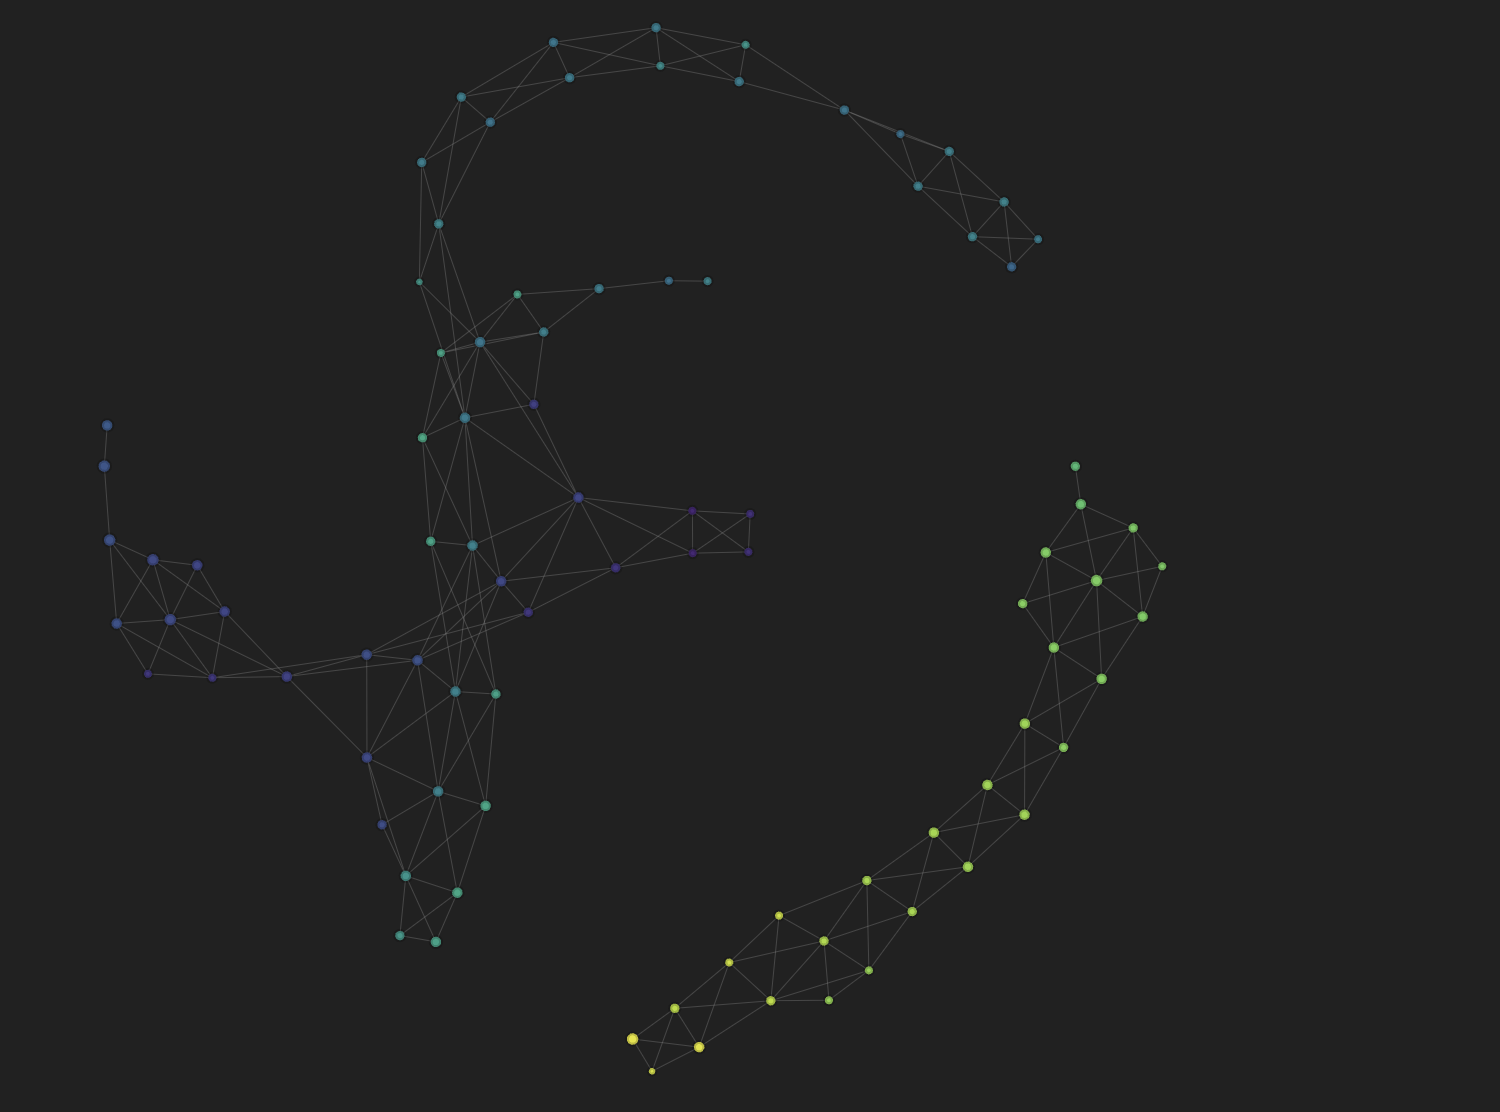

De primeras impresiones al observar el grafo vemos que tenemos dos componentes principales divididas, y en la componente más grande (en la imagen a la izquierda) tenemos muchas conexiones y parece que tenemos diferentes zonas que podrían representar diferentes cosas sobre nuestros datos.

Viendo rápidamente las fechas que agruparon los nodos, vemos que en la componente del lado derecho en la imagen, tenemos principalmente días del 2020 y 2021, en este periodo sabemos fue uno de los principales mercados alcistas de las criptomonedas, así que toda esta componente podría representar ese perido alcista.

Por otro lado en la otra componente, del lazo izquierdo tenemos fechas desde el 2014, más por el centro tenemos días del 2015 y 2016 y por la parte de arriba tenemos días principalmente del 2017 y 2018. Claro, no tenemos exlcusivametne días de esos años, sino que tenemos una combinación de varios días de diferentes años, pero esos son los que resaltan para esos nodos y zonas del grafo.



### Análisis de los nodos

Para adentrarnos más en el anális y comprender mejor el comportamiento y evolución del mercado de las criptomonedas veamos qué información tiene cada nodo y qué nos puede decir esto sobre su relación con otros nodos y su posición en el grafo. Recordemos que cada nodo es un agrupamiento de varios días que se comportaron de forma similar, así que primero veamos qué rango de fechas incluye cada nodo y el retorno medio para esos días.

In [ ]:
for node_id, member_idxs in graph['nodes'].items():
    # 1) Fechas de ese nodo
    fechas = df_agg.loc[member_idxs, 'Date']
    fecha_min = fechas.min().date()
    fecha_max = fechas.max().date()

    # 2) Retorno medio de mercado en esos días
    retorno_nodo = df_agg.loc[member_idxs, 'retorno'].mean()

    print(f"\nNodo {node_id}:")
    print(f" • Días agrupados : {len(member_idxs)}")
    print(f" • Rango fechas  : {fecha_min} → {fecha_max}")
    print(f" • Retorno medio : {retorno_nodo:.2%} ",
          "(↑ alza)" if retorno_nodo>0 else "(↓ baja)" if retorno_nodo<0 else "(→ estable)")


Nodo cube0_cluster0:
 • Días agrupados : 184
 • Rango fechas  : 2020-11-24 → 2021-07-06
 • Retorno medio : 0.81%  (↑ alza)

Nodo cube1_cluster0:
 • Días agrupados : 63
 • Rango fechas  : 2020-11-21 → 2021-07-06
 • Retorno medio : 1.36%  (↑ alza)

Nodo cube2_cluster0:
 • Días agrupados : 15
 • Rango fechas  : 2020-11-22 → 2021-01-01
 • Retorno medio : 1.57%  (↑ alza)

Nodo cube3_cluster0:
 • Días agrupados : 10
 • Rango fechas  : 2020-11-20 → 2020-12-20
 • Retorno medio : 2.02%  (↑ alza)

Nodo cube5_cluster0:
 • Días agrupados : 6
 • Rango fechas  : 2020-11-24 → 2021-06-21
 • Retorno medio : -8.80%  (↓ baja)

Nodo cube6_cluster0:
 • Días agrupados : 25
 • Rango fechas  : 2019-06-27 → 2021-01-27
 • Retorno medio : -1.21%  (↓ baja)

Nodo cube7_cluster0:
 • Días agrupados : 27
 • Rango fechas  : 2019-06-27 → 2021-01-01
 • Retorno medio : -1.69%  (↓ baja)

Nodo cube8_cluster0:
 • Días agrupados : 31
 • Rango fechas  : 2019-06-30 → 2020-12-20
 • Retorno medio : -2.10%  (↓ baja)

Nodo cube9_

Como esperábamos, para los nodos que resultaron en la componente aislada de lado derecho (en general son los nodos numerados bajo (nodo 0 al 30 aprox con algunas exclusiones)) vemos que estos nodos las fechas que cubren son principalmente de los años 2020 y 2021. Asì que deade aquí concluimos por qué en el grafo de Mapper se agruparon estos nodos, están reoresentando el mercado alcista de 2020 - 2021.

Pero, para los otros nodos, abarcamos fechas de un rango muy grande de prácticamente todos los años exlcuyendo 2021 y a veces 2020. Esto no nos da mucho detalle así que observemos la capitalización de mercado y volúmen de cada uno de los nodos

In [ ]:
# Genera e imprime el resumen por nodo
summary = []

for node_id, idxs in graph['nodes'].items():
    avg_vol   = df_agg.loc[idxs, 'Volume'].mean()
    avg_mcap  = df_agg.loc[idxs, 'Marketcap'].mean()

    summary.append({
        'node': node_id,
        'avg_vol': avg_vol,
        'avg_mcap': avg_mcap,
    })

# Ordena por volumen medio descendente
summary.sort(key=lambda x: x['avg_vol'], reverse=True)

# Imprime de forma legible
for item in summary:
    print(
        f"\nNodo {item['node']}: "
        f"Volumen medio = {item['avg_vol']:,.2f}, "
        f"Marketcap medio = {item['avg_mcap']:,.2f}, "
    )


Nodo cube0_cluster0: Volumen medio = 260,411,596,425.13, Marketcap medio = 1,400,879,636,306.66, 

Nodo cube5_cluster0: Volumen medio = 240,686,136,902.22, Marketcap medio = 721,267,823,797.25, 

Nodo cube1_cluster0: Volumen medio = 184,470,442,916.70, Marketcap medio = 1,039,927,847,264.43, 

Nodo cube6_cluster0: Volumen medio = 181,266,434,651.33, Marketcap medio = 490,303,480,051.05, 

Nodo cube2_cluster0: Volumen medio = 165,647,114,877.81, Marketcap medio = 610,484,370,540.21, 

Nodo cube7_cluster0: Volumen medio = 157,657,302,016.30, Marketcap medio = 474,655,761,636.10, 

Nodo cube3_cluster0: Volumen medio = 144,241,113,505.46, Marketcap medio = 531,658,221,425.78, 

Nodo cube17_cluster0: Volumen medio = 136,785,947,723.75, Marketcap medio = 235,175,939,209.08, 

Nodo cube8_cluster0: Volumen medio = 135,839,530,729.44, Marketcap medio = 356,431,096,858.49, 

Nodo cube18_cluster0: Volumen medio = 122,676,609,746.40, Marketcap medio = 268,489,530,509.34, 

Nodo cube9_cluster0: Vo

La capitalización de mecardo y volumen medio nos da gran información sobre el comportamiento de las crypto y su agrupamiento.
- Vemos que de forma lógica los nodos de la componente derecha tienen mayor capitalización de mercado y mayor volúmen, lo que nos pone a pensar que cuando sube el precio la gente compra más.

- Por otro lado tenemos algo muy interesante, tenemos nodos de otras zonas también con alto volúmen y capitalización de mercado. Los nodos de la parte superior del grafo (nodos como el 26 y 27 o el 35) tienen muy alta capitalización de mercado y volúmen, sin embargo aquí no hay una clara tendencia de mercado alcista o bajista, así que esta zona está representando un comportamiento característico que no es necesariamente alcista cuando hay alto volúmen y capitalización de mercado.

- Finalmente, vemos que los nodos de abajo a la izquierda (nodos en el rango de los 80s) tienen volumen y capitalización de mercado baja.

Para verificar esto, tomemos algunos nodos de las diferentes zonas y veamos sus métricas princiapales Lo que haremos será dividir en terciles bajo - medio - alto el volumen y capitalización de mercado de todos los nodos para así clasificar específicamente para los nodos que buscamos en qué rango caen y cómo se comparan con el resto

In [37]:
rows = []
for node_id, idxs in graph['nodes'].items():
    fechas = df_agg.loc[idxs, 'Date']
    rows.append({
        'node'      : node_id,
        'n_days'    : len(idxs),
        'start_date': fechas.min().date(),
        'end_date'  : fechas.max().date(),
        'avg_vol'   : df_agg.loc[idxs, 'Volume'].mean(),
        'avg_mcap'  : df_agg.loc[idxs, 'Marketcap'].mean(),
        'avg_ret'   : df_agg.loc[idxs, 'retorno'].mean()
    })
df_nodes = pd.DataFrame(rows)

# Calcula terciles de volumen y marketcap
vol_terciles   = df_nodes['avg_vol'].quantile([1/3, 2/3]).values
mcap_terciles  = df_nodes['avg_mcap'].quantile([1/3, 2/3]).values

def categorize(value, terciles):
    low, high = terciles
    if value < low:
        return 'Bajo'
    elif value < high:
        return 'Medio'
    else:
        return 'Alto'

# Lista de nodos a analizar
selected_nodes = [
    'cube0_cluster0', #componente derecha
    'cube60_cluster0', # parte media
    'cube90_cluster0', #parte izquierda
    'cube52_cluster0', #parte media
    'cube44_cluster0', # parte alta
    'cube40_cluster0', # parte media - alta
    'cube27_cluster0', #parte alta - derecha
    'cube35_cluster0', # parte alta - derecha


]


for node_id in selected_nodes:
    if node_id not in df_nodes['node'].values:
        print(f"⚠ Nodo {node_id} no existe en el grafo.")
        continue

    stats   = df_nodes.set_index('node').loc[node_id]
    vol_cat = categorize(stats['avg_vol'],  vol_terciles)
    mcap_cat= categorize(stats['avg_mcap'], mcap_terciles)

    print(f"\n=== Nodo: {node_id} ===")
    print(f" Días agrupados   : {stats['n_days']}")
    print(f" Rango fechas     : {stats['start_date']} → {stats['end_date']}")
    print(f" Retorno medio    : {stats['avg_ret']*100:.2f}%")
    print(f" Volumen medio    : {stats['avg_vol']:,.2f} ({vol_cat})")
    print(f" Marketcap medio  : {stats['avg_mcap']:,.2f} ({mcap_cat})")


=== Nodo: cube0_cluster0 ===
 Días agrupados   : 184
 Rango fechas     : 2020-11-24 → 2021-07-06
 Retorno medio    : 0.81%
 Volumen medio    : 260,411,596,425.13 (Alto)
 Marketcap medio  : 1,400,879,636,306.66 (Alto)

=== Nodo: cube60_cluster0 ===
 Días agrupados   : 114
 Rango fechas     : 2013-12-27 → 2019-03-15
 Retorno medio    : 1.51%
 Volumen medio    : 6,950,974,228.72 (Medio)
 Marketcap medio  : 120,489,454,080.54 (Medio)

=== Nodo: cube90_cluster0 ===
 Días agrupados   : 234
 Rango fechas     : 2014-02-05 → 2017-04-17
 Retorno medio    : 0.14%
 Volumen medio    : 70,350,650.17 (Bajo)
 Marketcap medio  : 8,784,228,259.11 (Bajo)

=== Nodo: cube52_cluster0 ===
 Días agrupados   : 147
 Rango fechas     : 2017-06-03 → 2019-03-25
 Retorno medio    : -0.04%
 Volumen medio    : 9,219,511,708.80 (Medio)
 Marketcap medio  : 168,635,647,228.89 (Medio)

=== Nodo: cube44_cluster0 ===
 Días agrupados   : 16
 Rango fechas     : 2014-05-23 → 2018-02-03
 Retorno medio    : 6.74%
 Volumen medi

Esto nos revela y nos confirma toda la información que necesitábamos para entender el mercado de las criptomonedas.

- Los nodos de la parte superior están agrupando días en donde el volumen y capitalización de mercado es media-alta y donde el retorno es grande, en cualquier dirección pero un retorno grande. Si nos fijamos más a detalle en las fechas que incluyen estos nodos, los de retorno alcista incluyen más de 2016 y 2017 y los bajistas más de 2018 y 2019, así que es probable que el precio en 2017 haya subido y en 2018 bajado.

- Los nodos medios estan agrupando días con capitalizaciôn de mercado medio y retorno medio. Los nodos inferiores agrupan días con volumen y mcap bajo. Finalmente, la componente derecha agrupa volumen y mcap altos.

Lo interesante aquí son los nodos de la parte superior, lo que nos está diciendo aquí es que en este mercado el volumen no es un dictador de cómo se moverá el precio. Y también nos está diciendo que el mercado puede parecer bien establecido (con buen volumen y capitalización de mercado) y aún así puede tener días y temporadas muy bajistas, es un mercado volátil.

Para agregar más al análisis y hacerlo más interesante, veámos que criptos son los principales ganadores y perdedores en cada nodo.

In [ ]:
for node_id, member_idxs in graph['nodes'].items():
    # 1) Fechas que cayeron en este nodo
    fechas_nodo = df_agg.loc[member_idxs, 'Date']

    # 2) Filtra el df original para esos días
    sub = df_crypto[df_crypto['Date'].isin(fechas_nodo)]

    # 3) Calcula el retorno medio por crypto
    retorno_por_coin = (
        sub
        .groupby('Symbol')['retorno']
        .mean()
        .sort_values(ascending=False)
    )

    # 4) Toma las top 5
    top5 = retorno_por_coin.head(5)
    bottom5 = retorno_por_coin.tail(5)

    # 5) Imprime resultados
    print(f"\nNodo {node_id} — top 5 criptos por retorno medio:")
    for symbol, ret in top5.items():
        print(f"  • {symbol:6s}: {ret:.2%}")
    print(f"\nNodo {node_id} — bottom 5 criptos por retorno medio:")
    for symbol, ret in bottom5.items():
        print(f"  • {symbol:6s}: {ret:.2%}")


Nodo cube0_cluster0 — top 5 criptos por retorno medio:
  • DOGE  : 4.08%
  • SOL   : 1.82%
  • BNB   : 1.58%
  • ADA   : 1.41%
  • XRP   : 0.95%

Nodo cube0_cluster0 — bottom 5 criptos por retorno medio:
  • BTC   : 0.16%
  • LTC   : 0.15%
  • USDC  : 0.00%
  • USDT  : -0.00%
  • XEM   : -0.04%

Nodo cube1_cluster0 — top 5 criptos por retorno medio:
  • UNI   : 2.78%
  • DOGE  : 2.69%
  • XLM   : 2.22%
  • AAVE  : 2.18%
  • ADA   : 2.03%

Nodo cube1_cluster0 — bottom 5 criptos por retorno medio:
  • BTC   : 0.51%
  • WBTC  : 0.49%
  • XMR   : 0.28%
  • USDT  : 0.01%
  • USDC  : 0.01%

Nodo cube2_cluster0 — top 5 criptos por retorno medio:
  • DOT   : 4.57%
  • LTC   : 3.22%
  • UNI   : 3.11%
  • WBTC  : 3.05%
  • BTC   : 2.98%

Nodo cube2_cluster0 — bottom 5 criptos por retorno medio:
  • TRX   : 0.18%
  • XMR   : 0.09%
  • USDC  : -0.00%
  • USDT  : -0.01%
  • XRP   : -0.63%

Nodo cube3_cluster0 — top 5 criptos por retorno medio:
  • ADA   : 4.10%
  • XEM   : 3.61%
  • DOGE  : 3.36%


Esto nos brinda una última información muy interesante al análisis. Aunque sabemos que BTC es el líder de este mercado, vemos que en nodos donde el retorno es grande (ya sea positivo o negativo), las criptomonedas que tienen ganancias más altas son las altcoins como CRO, SOL y ADA, mientras que BTC se mantiene un poco más estable. Esto es interesante porque si lo vemos en términos de inversión, el riesgo y retorno más grandes están en las altcoins, mientras que BTC es un poco menos volátil.

### Interpretación de Resultados

- Con nuestro resultados vemos agrupados varios días alcistas de 2020 y 2021 en una componente, vemos también días con alto volumen y capitalización de mercado en donde el retorno es fuerte tanto hacía arriba como hacia abajo. Vemos en el centro del grafo días en donde el retorno es medio y el mercado parece estar estabilizándose. Y finalmente vemos días en donde el mercado no tenía todavía tanto volúmen ni capitalización de mercado y su transición poco a poco hacia el primer mercado alcista.


- Con esto ya podemos armar una "historia" sobre la evolución de las criptomonedas. En sus incicios el volumen era bajo y la capitalización de mercado (el precio) no se movía mucho. En 2017 y 2018 las criptomonedas empiezan a adquierir popularidad y vemos la entrada de nuevas criptos al mercado, esto resulta en un increíble volumen pero también una increíble volatilidad, donde podemos tener días gigantescamente alcistas pero también días o temporadas bajistas, en esta etapa el volumen no define el precio, el mercado es volatil. En 2019 el mercado parece encontrar tierra, deja de ser tan volatil y parece empezar a consolidarse, con un volumen sólido pero una capitalización de mercado estable. Finalmente en 2020 y 2021 vemos el gran boom de las criptomonedas, el volumen no deja de crecer y tampoco lo hace el precio de las monedas, aunque existen días bajistas en esta épioca, en general la tendencia es altamente alcista. Esto concuerda perfectamente con las características del mercado que vimos, tenemos el halving, tenemos las altcoins jugando en el mercado, tenemos la entrada de DeFi y de los NFTs, esta es la época dorada de las criptomonedas. El análisis topológico confirmó estas etapas sin necesidad de definir fechas: agrupó automáticamente los días de máximo frenesí y los de crash en nodos separados, y los puentes de transición en nodos con retornos intermedios.

### Conclusiones

En conclusión, este análisis topológico fue muy enriquecedor y no dejó ver cosas que una gráfica de precios no nos hubiera permitido, aquí construimos y vimso toda la evolución de las criptomonedas. Nuestro recorrido topológico muestra un pasaje claro desde la infancia cripto (nodos de bajo volumen y marketcap, 2013–2016), pasando por la euforia y el crash de 2017–2018 (nodos de volumen/marketcap medio-alto con retornos muy positivos y muy negativos), la consolidación de 2019 (nodos de régimen estable) y el gran bull run de 2020–2021 (nodos de máximo volumen y retornos mayoritariamente alcistas)

Estos resultados nos dejan algo en claro, el nivel de volumen y capitalización en sí no define la dirección del mercado; tanto las grandes subidas como las grandes caídas ocurren cuando el mercado tiene ya madurez y liquidez. Nos deja muy en claro este análisis que las criptomonedas son un activo muy volátil y pueden tener movimientos muy bruscos, y aqune pueden tener épocas doradas, tienen sus mercados bajistas también, así que hay que invertir con cuidado.

Curiosamente, el mercado de las criptomonedas cayó en su mayor mercado bajista en 2022 después de llegar a sus máximos (en ese tiempo) en 2021. Creo firmemente que un análisis topológico de este estilo en tiempo real nos podría haber alertado de esta caída que vendría. Tal vez hubiéramos visto los “nodos puente” que aparecen justo al final de la isla amarilla (la componente derecha) con retornos medios ya decayendo hacia cero o negativos, pero aún en volúmenes elevados, y eso habría marcado la transición de bull a bear.

El algoritmo de Mapper mostró ser muy efectivo para contar la historia y la evolución de las criptomonedas ya que fue capaz de agrupar perfectamente los días que compartían características en el mercado.

### Referencias

Binance Academy. (2024). What is a cryptocurrency? Recuperado el 1 de mayo de 2025, de https://academy.binance.com/en/articles/what-is-a-cryptocurrency
Binance Academy. (2022). What is cryptocurrency mining and how does it work? Recuperado el 1 de mayo de 2025, de https://academy.binance.com/en/articles/what-is-crypto-mining-and-how-does-it-work
CoinMarketCap. (2024). Cryptocurrency Price History. Recuperado el 1 de mayo de 2025, de https://coinmarketcap.com/historical/
Investopedia. (2023). What You Need to Know Ahead of the Bitcoin Halving. Recuperado el 1 de mayo de 2025, de https://www.investopedia.com/what-you-need-to-know-ahead-of-the-bitcoin-halving-8634750